# Question 1: Performance of schools with art programs versus no art programs

Question 1: How do art programs affect state test results (ELA) in New York City schools?

Hypothesis: IF art programs have an affect on state test results THEN there will be a statistically significant difference in state test scores between schools with a full time arts supervisor and schools without a full time arts supervisor.
    
Null Hypothesis: IF art programs do not have an affect on state test results THEN there will be no statistically significant difference in state test scores between schools with a full time arts supervisor and schools without a full time arts supervisor.


GET AND MERGE DATA

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


In [147]:
#load data 
#resource for converting:https://medium.com/better-programming/using-python-to-convert-worksheets-in-an-excel-file-to-separate-csv-files-7dd406b652d7

#survey_2014_2015 = "2014-2015_Arts_Survey_Data.csv"
#survey_2015_2016 = "2015-2016_Arts_Survey_Data.csv"
survey_2016_2017 = "2016_-_2017_Arts_Survey_data.csv"
survey_2017_2018 = "2017-2018_Arts_Data_Report (1).csv"
survey_2018_2019 = "Copy of 2018 -2019 Arts Data Report.csv"
ELA_2013_2019 = "2013-2019 ELA State Test Results.csv"
Math_2013_2019 = "2013-2019 Math State Test Results.csv"

#survey_2014_2015_df = pd.read_csv(survey_2014_2015, encoding='utf-8', dtype = 'unicode')
#survey_2015_2016_df = pd.read_csv(survey_2015_2016, encoding='utf-8', dtype = 'unicode')
survey_2016_2017_df = pd.read_csv(survey_2016_2017, encoding='utf-8', dtype = 'unicode')
survey_2017_2018_df = pd.read_csv(survey_2017_2018, encoding='utf-8', dtype = 'unicode')
survey_2018_2019_df = pd.read_csv(survey_2018_2019, encoding='utf-8', dtype = 'unicode')
ELA_2013_2019_df = pd.read_csv(ELA_2013_2019, encoding='utf-8', dtype = 'unicode')
Math_2013_2019_df = pd.read_csv(Math_2013_2019, encoding='utf-8', dtype = 'unicode')

In [148]:
#Merge data by DBN and SchoolYear


#Add SchoolYear columns and SchoolYear to each survey file
survey_2016_2017_df["Year"] = '2017'
survey_2017_2018_df["Year"] = '2018'
survey_2018_2019_df["Year"] = '2019'

#Add subject to state test score files
ELA_2013_2019_df["Subject"] = 'ELA'
Math_2013_2019_df["Subject"] = 'Math'

#Change Q0_DBN column to just DBN in survey data
survey_2016_2017_dbn = survey_2016_2017_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2016_2017_dbn
survey_2017_2018_dbn = survey_2017_2018_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2017_2018_dbn
survey_2018_2019_dbn = survey_2018_2019_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2018_2019_dbn

#Append survey results
survey_2016_2018 = survey_2016_2017_dbn.append(survey_2017_2018_dbn)
survey_2016_2019 = survey_2016_2018.append(survey_2018_2019_dbn)
survey_2016_2019
#append state test files
TestResults_2013_2019 = ELA_2013_2019_df.append(Math_2013_2019_df)
TestResults_2013_2019

#Merge survey and state test results files on Year and DBN
combined_df = pd.merge(TestResults_2013_2019, survey_2016_2019, how='inner', on=['Year', 'DBN'])
#combined_df.head(1)


EXPLORE AND CLEAN DATA

In [149]:
#explore combined_df should have 27175 rows and 1840 columns
combined_df.shape

(27175, 1840)

In [150]:
#explore column headers
list(renamed_df.columns)

['DBN',
 'School Name',
 'Grade',
 'Year',
 'Subject',
 '# Level 3+4',
 '% Level 3+4',
 'Full Time',
 'Full Time Plus',
 'Part Time',
 'None']

In [151]:
#only choose columns necessary for analysis df1 = df[['a','b']]
cleaned_df = combined_df[["DBN", "School Name", "Grade", "Year", 
                          "Subject", "# Level 3+4", "% Level 3+4", 
                          "Q3_1", "Q3_2", "Q3_3", "Q3_4"]]
cleaned_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Q3_1,Q3_2,Q3_3,Q3_4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [152]:
#rename columns
   
col_rename_dict = {
    "Q3_1": "Full Time",
    "Q3_2": "Full Time Plus",
    "Q3_3": "Part Time",
    "Q3_4": "None",

}
renamed_df = cleaned_df.rename(columns=col_rename_dict)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [167]:
#68 rows have an 's' in the % of Level 3+4 and need to be removed
sorted_df = renamed_df.sort_values("% Level 3+4", ascending = True)
sorted_df["% Level 3+4"]
sorted_df.groupby(["% Level 3+4"]).count()


# Get names of indexes for which % Level 3+4 has value 's'
indexNames = renamed_df[renamed_df['% Level 3+4'] == 's' ].index
 
# Delete 's' row indexes from dataFrame
renamed_df.drop(indexNames , inplace=True)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0.0,1.0,0.0,0.0


In [168]:
#6275 rows have an 'All Grades' in the Grade column and need to be removed
sorted_df = renamed_df.sort_values("Grade", ascending = True)
sorted_df["Grade"]
sorted_df.groupby(["Grade"]).count()

# Get names of indexes for which Grade has value 'All Grades'
indexNames = renamed_df[renamed_df['Grade'] == 'All Grades' ].index
 
# Delete 'All Grades' row indexes from dataFrame
renamed_df.drop(indexNames , inplace=True)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0.0,1.0,0.0,0.0


In [155]:
#explore data
total = len(renamed_df)
total

20832

In [169]:
#change type
renamed_df['Full Time'] = renamed_df['Full Time'].astype(float)
renamed_df['Full Time Plus'] = renamed_df['Full Time Plus'].astype(float)
renamed_df['Part Time'] = renamed_df['Part Time'].astype(float)
renamed_df['None'] = renamed_df['None'].astype(float)
renamed_df['% Level 3+4'] = renamed_df['% Level 3+4'].astype(float)

In [171]:
#Write file to csv
#renamed_df.to_csv('renamed1_df.csv', index=False)


In [158]:
#Create buckets for each answer and ultimately create a full-time bucket and a non-full time bucket.

fulltime = renamed_df["Full Time"].sum()
fulltime
fulltimeplus = renamed_df["Full Time Plus"].sum()
fulltimeplus
parttime = renamed_df["Part Time"].sum()
parttime
none = renamed_df["None"].sum()
none
count_total = fulltime + fulltimeplus + parttime + none
alltheothers = fulltimeplus + parttime + none

#What to do with 30 rows of unanswered data?
unaccounted = total - count_total

summary_dict = {'Full Time Only': [fulltime],
        #  'Full Time Plus Count': [fulltimeplus],
         # 'Part Time Count': [parttime],
          #'None Count': [none],
                 'Not Full Time Only': [alltheothers],
               'Total of these measures': [count_total],
                 'Total': [total],
               'Did Not Answer': [unaccounted]}
summary = pd.DataFrame.from_dict(summary_dict) #, orient='index')
summary

,Full Time Only,Not Full Time Only,Total of these measures,Total,Did Not Answer
0,553.0,20249.0,20802.0,20832,30.0


Analyze Data
1. Math and ELA together
2. Math only
3. ELA only

In [159]:
#1. Math and ELA together frequencies
renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    20279
1.0      553
Name: % Level 3+4, dtype: int64

In [160]:
#2. Math only frequencies
cond1 = renamed_df['Subject'] == 'Math'
math_renamed_df = renamed_df[cond1]
math_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    10051
1.0      274
Name: % Level 3+4, dtype: int64

In [161]:
#3. ELA only frequencies
cond2 = renamed_df['Subject'] == 'ELA'
ela_renamed_df = renamed_df[cond2]
ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    10228
1.0      279
Name: % Level 3+4, dtype: int64

(array([1161., 2685., 3484., 3218., 2660., 2500., 2075., 1474.,  961.,
         614.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

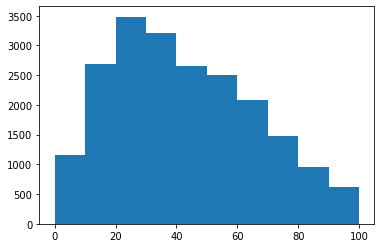

In [162]:
#1 Math and ELA together histograms
plt.hist(renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')

(array([ 867., 1561., 1639., 1438., 1197., 1113.,  989.,  699.,  525.,
         297.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

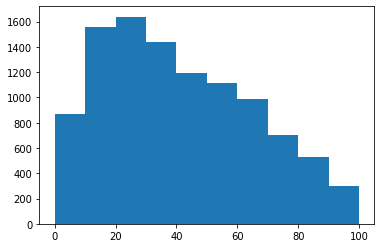

In [163]:
#2. Math histogram
plt.hist(math_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')


(array([ 294., 1124., 1845., 1780., 1463., 1387., 1086.,  775.,  436.,
         317.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

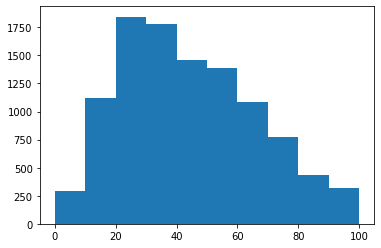

In [164]:
#3. ELA histogram
plt.hist(ela_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')

In [165]:
#1. Math and ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
MandELA_mean = renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
MandELA_median = renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
MandELA_var = renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
MandELA_std = renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
MandELA_max = renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
MandELA_min = renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

summary = pd.concat([MandELA_mean, MandELA_median, MandELA_var, MandELA_std, 
                     MandELA_max, MandELA_min], axis=1, join='inner')

summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,42.419986,39.3,540.682462,23.252580,100.0,0.0
1.0,45.742857,43.3,616.359410,24.826587,100.0,0.0


In [166]:
#2. Math descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
M_mean = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
M_median = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
M_var = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
M_std = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
M_max = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
M_min = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

m_summary = pd.concat([M_mean, M_median, M_var, M_std, 
                     M_max, M_min], axis=1, join='inner')

m_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
m_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,40.78826,37.5,594.006943,24.372258,100.0,0.0
1.0,43.49708,39.1,658.207244,25.655550,100.0,0.0


In [124]:
#3. ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
ela_mean = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
ela_median = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
ela_var = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
ela_std = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
ela_max = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
ela_min = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

ela_summary = pd.concat([ela_mean, ela_median, ela_var, ela_std, 
                     ela_max, ela_min], axis=1, join='inner')

ela_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
ela_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,44.023475,41.1,483.145606,21.980573,100.0,0.0
1.0,47.948387,46.6,567.628550,23.824956,100.0,4.1


In [73]:
#1. Math and ELA together Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = renamed_df[renamed_df['Full Time'] == 1]
none_test = renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=3.1104678181853913, pvalue=0.0019598636954945635)

In [125]:
#2. Math Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = math_renamed_df[renamed_df['Full Time'] == 1]
none_test = math_renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_indResult(statistic=1.7266192169256538, pvalue=0.0853136551958103)

In [130]:
#3. ELA Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = ela_renamed_df[renamed_df['Full Time'] == 1]
none_test = ela_renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_indResult(statistic=2.7202939268002924, pvalue=0.006914770235549835)

There is a statistically significant difference between schools with full time art supervisor and those without for ELA and ELA & Math combined (but not Math alone).

Use ANOVA to check for differences by year

In [180]:
#create conditions for each year
cond1 = renamed_df['Year'] == '2017'
cond2 = renamed_df['Year'] == '2018'
cond3 = renamed_df['Year'] == '2019'

#create data frame for each year
df_2017 = renamed_df[cond1]
df_2018 = renamed_df[cond2]
df_2019 = renamed_df[cond3]

group1 = df_2017["% Level 3+4"]
group2 = df_2018["% Level 3+4"]
group3 = df_2019["% Level 3+4"]

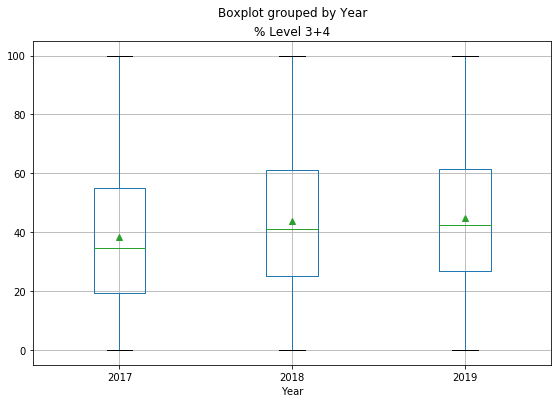

In [183]:
#boxplot
renamed_df.boxplot("% Level 3+4", by="Year", figsize=(9, 6), meanline=False, showmeans=True)

In [214]:
#ANOVA to see if school years are significantly different
stats.f_oneway(group1, group2, group3)
#stats.f_oneway(group2, group3)
#stats.f_oneway(group1, group2)

F_onewayResult(statistic=196.03906654233265, pvalue=3.1085472354534697e-44)

Look for schools who went from having no full time arts supervisor to having full time supervisor

In [202]:
#Merge to identify schools that changed from no full time to full time
cond1 = df_2017['Full Time'] == 0
cond2 = df_2018['Full Time'] == 1
cols = ["DBN", "School Name", 'Year', "% Level 3+4", "Full Time"]

df_2017_noft = df_2017[cond1][cols]
df_2018_ft = df_2018[cond2][cols]


#merge on DBN DataFrame.merge(self, right, how='inner', on=None,
change_table = df_2017_noft.merge(df_2018_ft, how = 'inner', on='DBN')
change_table

,DBN,School Name_x,Year_x,% Level 3+4_x,Full Time_x,School Name_y,Year_y,% Level 3+4_y,Full Time_y
0,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0,P.S. 033 CHELSEA PREP,2018,68.8,1.0
1,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0,P.S. 033 CHELSEA PREP,2018,63.4,1.0
2,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0,P.S. 033 CHELSEA PREP,2018,69.9,1.0
3,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0,P.S. 033 CHELSEA PREP,2018,64.8,1.0
4,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0,P.S. 033 CHELSEA PREP,2018,61.0,1.0
...,...,...,...,...,...,...,...,...,...
740,31R075,I.S. 075 FRANK D. PAULO,2017,33.1,0.0,I.S. 075 FRANK D. PAULO,2018,64.9,1.0
741,31R075,I.S. 075 FRANK D. PAULO,2017,33.1,0.0,I.S. 075 FRANK D. PAULO,2018,65.9,1.0
742,31R075,I.S. 075 FRANK D. PAULO,2017,33.1,0.0,I.S. 075 FRANK D. PAULO,2018,56.9,1.0
743,31R075,I.S. 075 FRANK D. PAULO,2017,33.1,0.0,I.S. 075 FRANK D. PAULO,2018,60.5,1.0


In [207]:
#separate and append to be able to run tests and create box plot
cols1 = ["DBN", "School Name_x", "Year_x", "% Level 3+4_x", "Full Time_x"]
cols2 = ["DBN", "School Name_y", "Year_y", "% Level 3+4_y", "Full Time_y"]

firstyear = change_table[cols1]
secondyear = change_table[cols2]

#rename columns df.rename(columns={"A": "a", "B": "c"})
first_clean = firstyear.rename(columns={"School Name_x": "School_Name", 
                          "Year_x": "Year", 
                          "% Level 3+4_x": "% Level 3+4",
                          "Full Time_x": "Full Time"})
second_clean = secondyear.rename(columns={"School Name_y": "School_Name", 
                          "Year_y": "Year", 
                          "% Level 3+4_y": "% Level 3+4",
                          "Full Time_y": "Full Time"})

appended_df = first_clean.append(second_clean)
appended_df

,DBN,School_Name,Year,% Level 3+4,Full Time
0,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0
1,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0
2,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0
3,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0
4,02M033,P.S. 033 CHELSEA PREP,2017,66.3,0.0
...,...,...,...,...,...
740,31R075,I.S. 075 FRANK D. PAULO,2018,64.9,1.0
741,31R075,I.S. 075 FRANK D. PAULO,2018,65.9,1.0
742,31R075,I.S. 075 FRANK D. PAULO,2018,56.9,1.0
743,31R075,I.S. 075 FRANK D. PAULO,2018,60.5,1.0


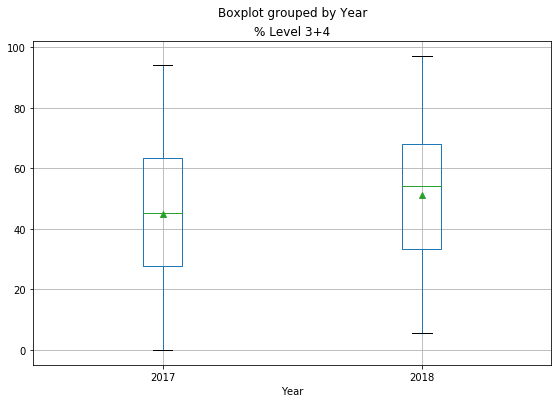

In [209]:
appended_df.boxplot("% Level 3+4", by="Year", figsize=(9, 6), meanline=False, showmeans=True)

In [212]:
nofulltime_test = appended_df[appended_df['Year'] == '2017']
fulltime_test = appended_df[appended_df['Year'] == '2018']

stats.ttest_ind(nofulltime_test['% Level 3+4'], fulltime_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=-5.3262134537348995, pvalue=1.1569612230757749e-07)

In [217]:
#How many schools is this?
change_table["DBN"].value_counts()

27Q232    144
15K130     36
30Q145     36
12X314     36
02M033     36
03M242     36
15K001     36
07X161     36
31R075     36
26Q216     36
03M421     36
05M194     36
24Q005     36
28Q680     36
26Q098     36
19K409     36
19K065     36
30Q286     25
Name: DBN, dtype: int64

In [223]:
grouped_append = appended_df.groupby(["DBN", "Year"], as_index=False)["% Level 3+4"].mean()
grouped_append.head(5)

,DBN,Year,% Level 3+4
0,02M033,2017,68.083333
1,02M033,2018,66.133333
2,03M242,2017,21.666667
3,03M242,2018,25.150000
4,03M421,2017,21.600000


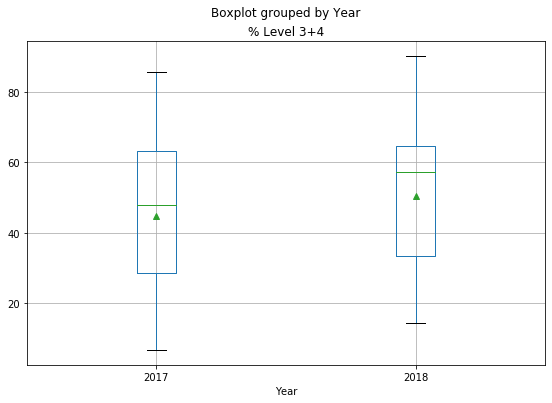

In [224]:
grouped_append.boxplot("% Level 3+4", by="Year", figsize=(9, 6), meanline=False, showmeans=True)

In [225]:
grouped_nofulltime_test = grouped_append[grouped_append['Year'] == '2017']
grouped_fulltime_test = grouped_append[grouped_append['Year'] == '2018']

stats.ttest_ind(grouped_nofulltime_test['% Level 3+4'], grouped_fulltime_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=-0.7583663427736974, pvalue=0.45346055647080785)